In [1]:
#!/usr/bin/env python

import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
import time
from scipy import stats
import pandas as pd
import growth_simulations as g

In [2]:
td = [1.858, 3.353]
td_std = [0.4727, 0.9214]

# this script uses a simple adder model

par1 = {'nstep': 1000, 'dt':0.01, 'td': td, 'td_std': td_std, 'v_init':1.0, 'modeltype':1, 'A_mm':0.129,
    'trans_std_mm':0.9916, 'A_md':0.5086, 'trans_std_md':0.8610, 'delta':1.0}

# defining r and lambda to approximate the same average division times for daughters and mothers.

par1['lambda'] = scipy.optimize.fsolve(g.fn_1, x0=np.log(2.0) / np.mean(td), args=(par1['td'][0], par1['td'][1]))[0]
temp = 0.5/(np.exp(par1['lambda']*par1['td'][1])-1)
par1['r'] = temp/(1-temp)

In [3]:
init_pop = g.starting_popn(par1)
c,obs = g.discr_time_1(par1, init_pop)

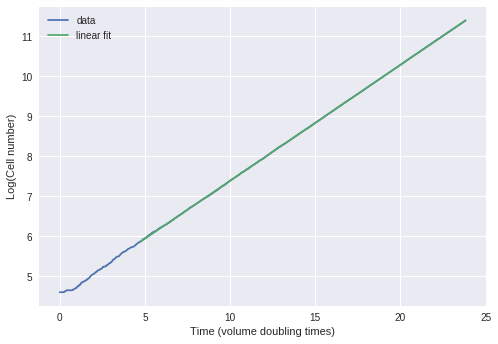

Relative growth rate =  0.995513027243
Error in growth rate =  0.00448697275653


In [4]:
plt.plot(obs[1],np.log(obs[4]), label='data')
vals=scipy.stats.linregress(obs[1][200:], np.log(obs[4][200:]))
plt.plot(obs[1][200:], obs[1][200:]*vals[0]+vals[1], label='linear fit')
plt.xlabel('Time (volume doubling times)')
plt.ylabel('Log(Cell number)')
plt.legend()
plt.show()
opt_val=scipy.optimize.fsolve(g.fn, x0=np.log(2.0)/np.mean(par1['td']), args=(par1['td'][0], par1['td'][1]))[0]
print 'Relative growth rate = ', vals[0]/par1['lambda']
print 'Error in growth rate = ', (par1['lambda']-vals[0])/par1['lambda']

In [5]:
cutoff = 200*par1['dt']
for i0 in range(2):
    temp = [obj.t_grow for obj in c if obj.celltype==i0 and obj.tb>cutoff]
    print np.mean(temp), td[i0]

1.85294917918 1.858
3.31819082216 3.353


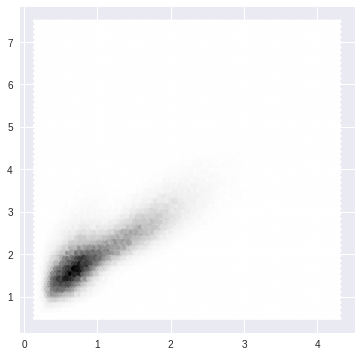

LinregressResult(slope=0.98510751457393098, intercept=1.0601412459308257, rvalue=0.80947614760079456, pvalue=0.0, stderr=0.0016947717664003779)


In [6]:
vd = np.asarray([obj.vd for obj in c if obj.tb>cutoff])
vb = np.asarray([obj.vb for obj in c if obj.tb>cutoff])
fig=plt.figure(figsize=[6,6])
plt.hexbin(vb,vd)
plt.show()
vals = scipy.stats.linregress(vb,vd)
print vals

In [9]:
t1 = np.asarray([obj.t_grow for obj in c[10**4:-1] if obj.celltype == 0])
t2 = np.asarray([obj.parent.t_grow for obj in c[10**4:-1] if obj.celltype == 0])

t3 = np.asarray([obj.t_grow for obj in c[10**4:-1] if obj.celltype == 1])
t4 = np.asarray([obj.parent_current.t_grow for obj in c[10**4:-1] if obj.celltype == 1])

print len(t1), len(t2), len(t3), len(t4)
print scipy.stats.linregress(scipy.stats.zscore(t2), scipy.stats.zscore(t1))[2]**2
print scipy.stats.linregress(scipy.stats.zscore(t4), scipy.stats.zscore(t3))[2]**2

83990 83990 83989 83989
0.024099900974
0.214031653205


In [8]:
temp1 = [obj for obj in c if obj.exists and obj.celltype == 1]
tgrowth = [[],[]]
for obj in temp1:
    tgrowth[1].append(obj.t_grow)
    tgrowth[0].append(obj.parent_current.t_grow)
# temp = [obj]
temp2 = scipy.stats.linregress(tgrowth[0],tgrowth[1])
print 'mother daughter correlation $R^2$', temp2[2]**2

temp = [obj for obj in c if obj.exists and obj.celltype == 0]
tgrowth = [[],[]]
for obj in temp:
    tgrowth[1].append(obj.t_grow)
    tgrowth[0].append(obj.parent.t_grow)
# temp = [obj]
temp2 = scipy.stats.linregress(tgrowth[0],tgrowth[1])
print 'mother mother correlation', temp2[2]**2

mother daughter correlation $R^2$ 0.219032884025
mother mother correlation 0.0156646408728


In [9]:
# td_std = [0.4727, 0.9214]
td_std = [0.001, 0.001]
par1['td_std']=td_std
init_pop = g.starting_popn(par1)
c,obs = g.discr_time_1(par1, init_pop)

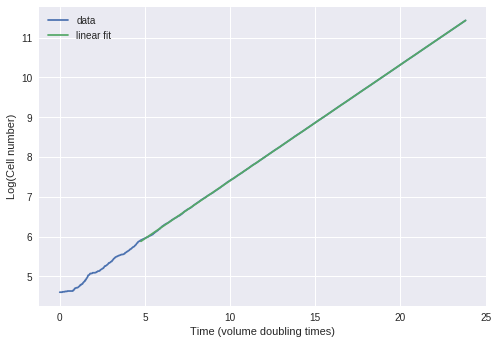

Relative growth rate =  1.0005268859
Error in growth rate =  -0.000526885904592


In [10]:
plt.plot(obs[1],np.log(obs[4]), label='data')
vals=scipy.stats.linregress(obs[1][200:], np.log(obs[4][200:]))
plt.plot(obs[1][200:], obs[1][200:]*vals[0]+vals[1], label='linear fit')
plt.xlabel('Time (volume doubling times)')
plt.ylabel('Log(Cell number)')
plt.legend()
plt.show()
opt_val=scipy.optimize.fsolve(g.fn, x0=np.log(2.0)/np.mean(par1['td']), args=(par1['td'][0], par1['td'][1]))[0]
print 'Relative growth rate = ', vals[0]/par1['lambda']
print 'Error in growth rate = ', (par1['lambda']-vals[0])/par1['lambda']

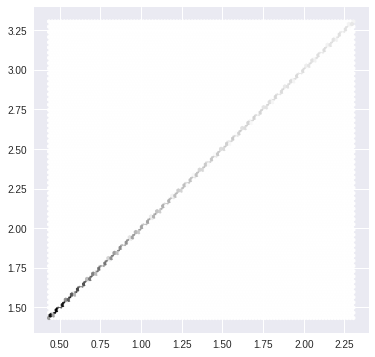

LinregressResult(slope=0.99999483416322621, intercept=1.0000057668958235, rvalue=0.9999992711258533, pvalue=0.0, stderr=2.8167713255036478e-06)


In [11]:
vd = np.asarray([obj.vd for obj in c if obj.tb>cutoff])
vb = np.asarray([obj.vb for obj in c if obj.tb>cutoff])
fig=plt.figure(figsize=[6,6])
plt.hexbin(vb,vd)
plt.show()
vals = scipy.stats.linregress(vb,vd)
print vals

In [12]:
temp1 = [obj for obj in c if obj.exists and obj.celltype == 1]
tgrowth = [[],[]]
for obj in temp1:
    tgrowth[1].append(obj.t_grow)
    tgrowth[0].append(obj.parent_current.t_grow)
# temp = [obj]
temp2 = scipy.stats.linregress(tgrowth[0],tgrowth[1])
print 'mother daughter correlation $R^2$', temp2[2]**2

temp = [obj for obj in c if obj.exists and obj.celltype == 0]
tgrowth = [[],[]]
for obj in temp:
    tgrowth[1].append(obj.t_grow)
    tgrowth[0].append(obj.parent.t_grow)
# temp = [obj]
temp2 = scipy.stats.linregress(tgrowth[0],tgrowth[1])
print 'mother mother correlation', temp2[2]**2

mother daughter correlation $R^2$ 0.999511327483
mother mother correlation 0.978130629692
